# Titanic Suvivor Analysis

## By: Tahsin Jahin Khalid

### Part V: Model Selection

#### Import Relevant Modules

In [26]:
import numpy as np
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
%matplotlib inline

#### Load Data

In [30]:
train_df = pd.read_pickle("interim_data/ready_ML.pkl")
test_df = pd.read_pickle("interim_data/ready_ML_test.pkl")

In [31]:
train_df.head(5)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [32]:
test_df.head(5)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [73]:
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())


In [74]:
test_df.isna().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Create Feature Matrix and Target

In [33]:
features = train_df.drop("Survived", axis=1)
target = train_df["Survived"]

In [34]:
features.head(5)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


#### Split Training Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.20,
                                                    random_state=3007)

In [36]:
print(f"""
Train Data size: {X_train.shape}  
Validation Data size: {X_test.shape}  
Train Target size: {y_train.shape} 
Validation Target size: {y_test.shape}    
""")


Train Data size: (712, 12)  
Validation Data size: (179, 12)  
Train Target size: (712,) 
Validation Target size: (179,)    



#### Logistic Regression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = lr.predict(X_test)

In [41]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)
print(f"Accuracy of Logistic Regression Model: {score_lr}%")

Accuracy of Logistic Regression Model: 83.8%


#### Naive Bayes Classifier

In [43]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [44]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100, 2)
print(f"Accuracy of Naive Bayes Model: {score_nb}%")

Accuracy of Naive Bayes Model: 82.68%


#### SVM

In [45]:
sv_model = svm.SVC(kernel="linear")
sv_model.fit(X_train, y_train)
y_pred_sv = sv_model.predict(X_test)
score_sv = round(accuracy_score(y_pred_sv, y_test)*100, 2)
print(f"Accuracy of SVM Model: {score_sv}%")

Accuracy of SVM Model: 82.68%


K Nearest Neighbours

In [46]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(y_pred_knn, y_test)*100, 2)
print(f"Accuracy of kNN Model: {score_knn}%")

Accuracy of kNN Model: 74.3%


Decision Trees

In [48]:
dt = DecisionTreeClassifier(random_state=3007)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(y_pred_dt, y_test)*100, 2)
print(f"Accuracy of Decision Tree Model: {score_dt}%")

Accuracy of Decision Tree Model: 75.98%


Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators=200, random_state=3007)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf, y_test)*100, 2)
print(f"Accuracy of Random Forest Model: {score_rf}%")

Accuracy of Random Forest Model: 81.56%


XGBoost Classifier

In [51]:
xgb_model = XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(y_pred_xgb, y_test)*100, 2)
print(f"Accuracy of XGBoost Model: {score_xgb}%")

Accuracy of XGBoost Model: 81.56%


Neural Network: MLP Classifier

In [52]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,10),
                          activation="relu",
                          solver="adam")
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [53]:
score_mlp = round(accuracy_score(y_pred_mlp, y_test)*100, 2)
print(f"Accuracy of MLP Model: {score_mlp}%")

Accuracy of MLP Model: 82.68%


#### Model Evaluation

In [54]:
models = ["Logistic Regression", "Naive Bayes",
          "SVM", "kNN",
          "Decision Tree", "Random Forest",
          "XGBClassifier", "MLPClassifier"]
scores = [score_lr, score_nb,
          score_sv, score_knn,
          score_dt, score_rf,
          score_xgb, score_mlp]

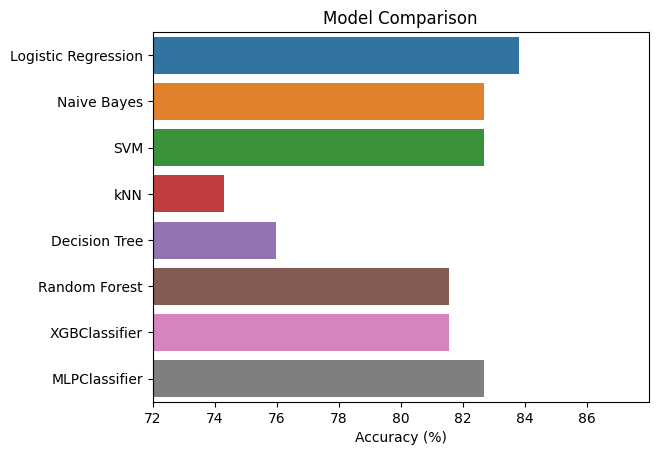

<Figure size 2000x1000 with 0 Axes>

In [69]:
sns.barplot(x=scores, y=models)
plt.xlim(72)
plt.xlabel("Accuracy (%)")
plt.title("Model Comparison")
plt.figure(figsize=(20,10))
plt.show()

Best Model is the Logistic Regression

#### Predicting the Survivor Metrics

In [75]:
predictions = lr.predict(test_df)

#### Submission Packaging

In [76]:
test_df_csv = pd.read_csv("data/test.csv", encoding="utf-8")

In [78]:
submit_df = pd.DataFrame()

In [79]:
submit_df["PassengerId"] = test_df_csv["PassengerId"]
submit_df["Survived"] = predictions

In [83]:
submit_df.set_index("PassengerId", inplace=True)

In [84]:
submit_df.to_csv("submissions.csv", encoding="utf-8", )